In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


INTERIM_PATH="data/interim/ENIGH"
RAW_PATH="data/raw/DATOS EDUCACION/ENCUESTA NACIONAL DE INGRESOS Y GASTOS EN LOS HOGARES/Extracted"

In [2]:
os.chdir('..')

# Data preparation

In [51]:
population_data=f"{RAW_PATH}/2022/conjunto_de_datos_poblacion_enigh2022_ns/conjunto_de_datos/conjunto_de_datos_poblacion_enigh2022_ns.csv"
bills_personal_data=f"{RAW_PATH}/2022/conjunto_de_datos_gastospersona_enigh2022_ns/conjunto_de_datos/conjunto_de_datos_gastospersona_enigh2022_ns.csv"
bills_cards_data=f"{RAW_PATH}/2022/conjunto_de_datos_gastotarjetas_enigh2022_ns/conjunto_de_datos/conjunto_de_datos_gastotarjetas_enigh2022_ns.csv"

dataframe_list=[]

### Bills

In [46]:
bills_catalogue=f"{RAW_PATH}/2022/conjunto_de_datos_gastospersona_enigh2022_ns/catalogos/gastos.csv"


In [47]:
bills=pd.read_csv(bills_catalogue,encoding='Windows-1252')
bills.head()

,gastos,descripcion
0,A001,Maíz en grano (de todo tipo y color)
1,A002,"Harina de maíz, maicena, fécula, nixtamalizada..."
2,A003,Masa de maíz (de todo tipo y color)
3,A004,Tortilla de maíz (de todo tipo y color)
4,A005,"Tostadas, raspadas, tostitos, totopos, tlayudas"


In [48]:
medical_bills=[f"J00{i}" for i in range(1,10)]+[f"J0{i}" for i in range(10,73)]
alcohol_and_cigarettes=[f"A{i}" for i in range(223,241)]

In [87]:
columns_interest=['folioviv', 'foliohog', 'numren', # Primary key 
                   'clave', 'mes_dia','frec_rem', 'forma_pag1', 'forma_pag2', 'forma_pag3', 'inscrip',
       'colegia', 'material', 'cantidad', 'gasto', 'costo', 'gasto_tri','entidad']

df=pd.read_csv(bills_personal_data)
df=df[columns_interest]

df['frec_rem']=df['frec_rem'].str.replace(' ','0')
df['cantidad']=df['cantidad'].str.replace(' ','0')
df['gasto']=df['gasto'].str.replace(' ','0')
df['costo']=df['gasto'].str.replace(' ','0')
df['gasto_tri']=df['gasto'].str.replace(' ','0')

formats={
    'clave':'string',
    'frec_rem':'int64',
    'cantidad':'float',
    'gasto':'float',
    'costo':'float',
    'gasto_tri':'float'
}

df=df.astype(formats)
df=df.rename(columns={'clave':'clave_gasto'})
dataframe_list.append(df)
df.head()


,folioviv,foliohog,numren,clave_gasto,mes_dia,frec_rem,forma_pag1,forma_pag2,forma_pag3,inscrip,colegia,material,cantidad,gasto,costo,gasto_tri,entidad
0,100005002,1,2,B005,1108,0,0,0,0,,,,0.0,90.0,90.0,90.0,1
1,100005002,1,2,B005,1111,0,0,0,0,,,,0.0,90.0,90.0,90.0,1
2,100019301,1,1,B005,902,0,0,0,0,,,,0.0,60.0,60.0,60.0,1
3,100019302,1,1,B005,904,0,0,0,0,,,,0.0,60.0,60.0,60.0,1
4,100019302,1,1,B005,831,0,0,0,0,,,,0.0,30.0,30.0,30.0,1


In [88]:
len(df)

402557

### Population

In [69]:
columns_interest=[
    'folioviv', 'foliohog', 'numren', # Primary key
    'parentesco', 'sexo', 'edad',
     'alfabetism','asis_esc', 'nivel', 'grado', 'tipoesc', 'tiene_b',
       'forma_b', 'tiene_c', 'forma_c', 'nivelaprob', 'gradoaprob',
       'antec_esc', 'residencia', 'diabetes', 'pres_alta', 'peso','num_trabaj'
]

df=pd.read_csv(population_data)
df=df[columns_interest]

df['nivel']=df['nivel'].str.replace(' ','0')
df['grado']=df['grado'].str.replace(' ','0')
df['alfabetism']=df['alfabetism'].str.replace(' ','0')
df['tipoesc']=df['tipoesc'].str.replace(' ','0')
df['asis_esc']=df['asis_esc'].str.replace(' ','0')
df['antec_esc']=df['antec_esc'].str.replace(' ','0')
df['num_trabaj']=df['num_trabaj'].str.replace(' ','0')
df['nivelaprob']=df['nivelaprob'].str.replace(' ','0')
df['gradoaprob']=df['gradoaprob'].str.replace(' ','0')

formats={
    'alfabetism':'int64',
    'asis_esc':'int64',
    'nivel':'int64',
    'grado':'int64',
    'tipoesc':'int64',
    'nivelaprob':'int64',
    'gradoaprob':'int64'
}

df=df.astype(formats)
dataframe_list.append(df)
df.head()

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_88977/2743913543.py:9: DtypeWarning: Columns (82,83,166) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(population_data)


,folioviv,foliohog,numren,parentesco,sexo,edad,alfabetism,asis_esc,nivel,grado,...,forma_c,nivelaprob,gradoaprob,antec_esc,residencia,diabetes,pres_alta,peso,entidad,num_trabaj
0,100005002,1,1,101,2,91,1,2,0,0,...,,2,4,0,01,1,1,1,1,0
1,100005002,1,2,301,2,48,1,2,0,0,...,,4,3,0,01,2,1,1,1,1
2,100005002,1,3,609,2,13,1,1,7,2,...,,3,1,0,01,2,2,1,1,0
3,100005003,1,1,101,1,68,1,2,0,0,...,,4,3,0,09,2,1,1,1,1
4,100005003,1,2,201,2,64,1,2,0,0,...,,7,5,3,09,1,1,1,1,1


In [90]:
df1=dataframe_list[0]
df2=dataframe_list[1]

df=pd.merge( df1, df2, on=['folioviv','foliohog','numren'], how='inner')
df

,folioviv,foliohog,numren,clave,mes_dia,frec_rem,forma_pag1,forma_pag2,forma_pag3,inscrip,...,forma_c,nivelaprob,gradoaprob,antec_esc,residencia,diabetes,pres_alta,peso,entidad_y,num_trabaj
0,100005002,1,2,B005,1108,0,0,0,0,,...,,4,3,0,01,2,1,1,1,1
1,100005002,1,2,B005,1111,0,0,0,0,,...,,4,3,0,01,2,1,1,1,1
2,100019301,1,1,B005,902,0,0,0,0,,...,,3,3,0,01,1,1,1,1,0
3,100019302,1,1,B005,904,0,0,0,0,,...,,7,5,3,01,1,1,1,1,1
4,100019302,1,1,B005,831,0,0,0,0,,...,,7,5,3,01,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402552,3260797706,1,4,E002,0,0,1,0,0,0,...,,2,5,0,32,,,2,32,0
402553,3260797706,1,5,E002,0,0,1,0,0,0,...,,2,3,0,32,,,1,32,0
402554,3260797706,1,6,E001,0,0,1,0,0,0,...,,1,2,0,32,,,1,32,0
402555,3260797907,1,3,E001,0,0,1,0,0,500,...,,1,2,0,32,,,1,32,0


In [91]:
df['year']=2022

In [92]:
bins = [1901,1924,1945, 1964, 1980, 1996, 2012, 2024 ]  # Define the edges of the bins
labels = ['Greatest','Silent','Baby Boomer', 'X', 'Milenial', 'Z','Alpha']  # Define labels for the categories

df['año_nacimiento']=df['year']-df['edad']
df['generacion'] = pd.cut(df['año_nacimiento'], bins=bins, labels=labels, right=True)
df.drop(columns='año_nacimiento', inplace=True)

# Graphs

### Medical Bills

In [93]:
medical_bills=[f"J00{i}" for i in range(1,10)]+[f"J0{i}" for i in range(10,73)]
alcohol_and_cigarettes=[f"A{i}" for i in range(223,241)]

In [96]:
m_df=df[[
       'folioviv', 'foliohog', 'numren', 'clave', 'mes_dia', 'frec_rem',
       'inscrip', 'colegia',
       'material', 'cantidad', 'gasto', 'costo', 'gasto_tri', 'entidad_x',
       'sexo', 'edad','generacion','alfabetism', 'asis_esc', 'nivel',
       'grado', 'tipoesc',
       'nivelaprob', 'gradoaprob',
       ]]

In [98]:
is_medical_bill=m_df['clave'].isin(medical_bills)
m_df=m_df[is_medical_bill]
m_df.groupby(['folioviv','foliohog','numren'])['gasto'].mean()

folioviv    foliohog  numren
100055502   1         1         0.0
100075703   1         1         0.0
100075705   1         1         0.0
100094203   1         4         0.0
100224706   1         1         0.0
                               ... 
3260415817  1         1         0.0
3260562004  1         1         0.0
3260616318  1         3         0.0
3260652811  1         2         0.0
3260788803  1         1         0.0
Name: gasto, Length: 4636, dtype: float64

In [107]:
bill_count=m_df.groupby(['folioviv','foliohog','numren'],as_index=False)['clave'].count()
bill_count=bill_count.rename(columns={'clave':'cantidad_de_gastos_medicos'})
bill_count

,folioviv,foliohog,numren,cantidad_de_gastos_medicos
0,100055502,1,1,1
1,100075703,1,1,3
2,100075705,1,1,2
3,100094203,1,4,2
4,100224706,1,1,2
...,...,...,...,...
4631,3260415817,1,1,2
4632,3260562004,1,1,3
4633,3260616318,1,3,5
4634,3260652811,1,2,2


In [108]:
m_df=pd.merge(m_df,bill_count,on=['folioviv','foliohog','numren'],how='inner')
m_df

,folioviv,foliohog,numren,clave,mes_dia,frec_rem,inscrip,colegia,material,cantidad,...,edad,generacion,alfabetism,asis_esc,nivel,grado,tipoesc,nivelaprob,gradoaprob,cantidad_de_gastos_medicos
0,100055502,1,1,J016,0,9,,,,0.0,...,33,Milenial,1,2,0,0,0,3,3,1
1,100075703,1,1,J031,0,8,,,,0.0,...,72,Baby Boomer,1,2,0,0,0,2,6,3
2,100075703,1,1,J032,0,8,,,,0.0,...,72,Baby Boomer,1,2,0,0,0,2,6,3
3,100075703,1,1,J035,0,8,,,,0.0,...,72,Baby Boomer,1,2,0,0,0,2,6,3
4,100075705,1,1,J031,0,8,,,,0.0,...,71,Baby Boomer,1,2,0,0,0,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10406,3260616318,1,3,J035,0,9,,,,0.0,...,34,Milenial,1,2,0,0,0,4,3,5
10407,3260652811,1,2,J024,0,9,,,,0.0,...,36,Milenial,1,2,0,0,0,3,3,2
10408,3260652811,1,2,J026,0,9,,,,0.0,...,36,Milenial,1,2,0,0,0,3,3,2
10409,3260788803,1,1,J016,0,8,,,,0.0,...,50,X,1,2,0,0,0,3,3,2


In [111]:
m_df.groupby('generacion')['cantidad_de_gastos_medicos'].mean()

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_88977/3944949701.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  m_df.groupby('generacion')['cantidad_de_gastos_medicos'].mean()


generacion
Greatest       1.000000
Silent         2.618321
Baby Boomer    2.872928
X              2.919034
Milenial       2.805930
Z              2.647963
Alpha          2.140187
Name: cantidad_de_gastos_medicos, dtype: float64

In [112]:
m_df.groupby('generacion')['cantidad_de_gastos_medicos'].count()

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_88977/167951948.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  m_df.groupby('generacion')['cantidad_de_gastos_medicos'].count()


generacion
Greatest          1
Silent          131
Baby Boomer    1448
X              3977
Milenial       3339
Z              1301
Alpha           214
Name: cantidad_de_gastos_medicos, dtype: int64

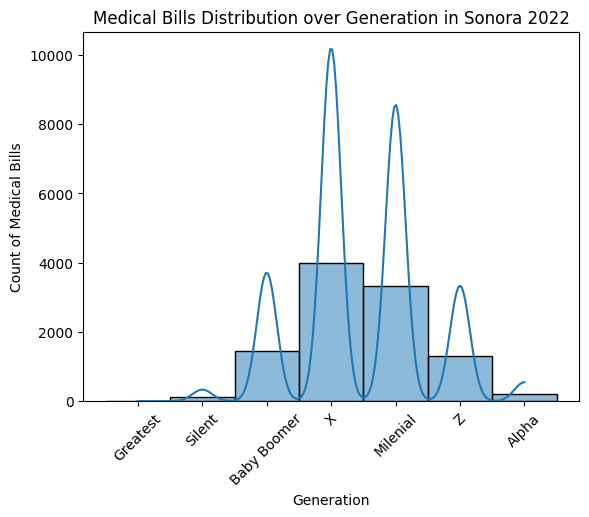

In [138]:
data=m_df
sns.histplot(data=data, x='generacion', bins=100, kde=True)

plt.title('Medical Bills Distribution over Generation in Sonora 2022')
plt.xlabel('Generation')
plt.ylabel('Count of Medical Bills')
plt.xticks(rotation=45)
plt.show()

### Vices

In [127]:
a_df=df[[
       'folioviv', 'foliohog', 'numren', 'clave', 'mes_dia', 'frec_rem',
       'inscrip', 'colegia',
       'material', 'cantidad', 'gasto', 'costo', 'gasto_tri', 'entidad_x',
       'sexo', 'edad','generacion','alfabetism', 'asis_esc', 'nivel',
       'grado', 'tipoesc',
       'nivelaprob', 'gradoaprob',
       ]]

In [128]:
is_alcohol_or_cigarette_bill=a_df['clave'].isin(alcohol_and_cigarettes)
a_df=a_df[is_alcohol_or_cigarette_bill]
len(a_df)

19

In [123]:
is_alcohol_or_cigarette_bill=a_df['clave'].isin(alcohol_and_cigarettes)
a_df=a_df[is_alcohol_or_cigarette_bill]
alcohol_and_cigarettes_count=a_df.groupby(['folioviv','foliohog','numren'],as_index=False)['clave'].count()
alcohol_and_cigarettes_count=alcohol_and_cigarettes_count.rename(columns={'clave':'alcohol_cigarette_count'})
a_df=pd.merge(a_df,alcohol_and_cigarettes_count,on=['folioviv','foliohog','numren'],how='inner')

In [126]:
a_df

,folioviv,foliohog,numren,clave,mes_dia,frec_rem,inscrip,colegia,material,cantidad,...,edad,generacion,alfabetism,asis_esc,nivel,grado,tipoesc,nivelaprob,gradoaprob,alcohol_cigarette_count
0,260093724,1,1,A224,1010,3,,,,1.420,...,49,X,1,2,0,0,0,2,2,2
1,260093724,1,1,A224,1015,3,,,,1.420,...,49,X,1,2,0,0,0,2,2,2
2,301197314,1,1,A224,904,1,,,,6.000,...,48,X,1,2,0,0,0,0,0,1
3,702019902,1,1,A224,1101,4,,,,1.000,...,28,Milenial,1,2,0,0,0,2,6,1
4,920175306,1,1,A239,901,1,,,,3.000,...,27,Milenial,1,2,0,0,0,3,3,1
5,1003117203,1,1,A224,820,9,,,,0.990,...,28,Milenial,1,2,0,0,0,3,3,1
6,1108678209,1,2,A224,820,3,,,,2.838,...,44,X,1,2,0,0,0,4,3,2
7,1108678209,1,2,A224,826,3,,,,25.838,...,44,X,1,2,0,0,0,4,3,2
8,1907766205,1,1,A224,820,6,,,,0.710,...,67,Baby Boomer,1,2,0,0,0,3,3,6
9,1907766205,1,1,A224,821,6,,,,0.710,...,67,Baby Boomer,1,2,0,0,0,3,3,6


In [125]:
a_df.groupby('generacion')['alcohol_cigarette_count'].count()

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_88977/1291478364.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a_df.groupby('generacion')['alcohol_cigarette_count'].count()


generacion
Greatest       0
Silent         0
Baby Boomer    7
X              7
Milenial       5
Z              0
Alpha          0
Name: alcohol_cigarette_count, dtype: int64

### Grades

In [143]:
g_df=df[[
       'folioviv', 'foliohog', 'numren', 'clave', 'mes_dia', 'frec_rem',
       'inscrip', 'colegia',
       'material', 'cantidad', 'gasto', 'costo', 'gasto_tri', 'entidad_x',
       'sexo', 'edad','generacion','alfabetism', 'asis_esc', 'nivel',
       'grado', 'tipoesc',
       'nivelaprob', 'gradoaprob',
       ]]

g_df['entidad']=g_df['folioviv']//10**8

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_88977/68764286.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_df['entidad']=g_df['folioviv']//10**8


In [153]:
g_df.groupby('entidad')['gradoaprob'].value_counts(normalize=True).reset_index(name='proportion')


,entidad,gradoaprob,proportion
0,1,3,0.523231
1,1,2,0.129568
2,1,1,0.116738
3,1,6,0.100019
4,1,4,0.060556
...,...,...,...
219,32,2,0.151719
220,32,6,0.087190
221,32,5,0.084694
222,32,4,0.051085


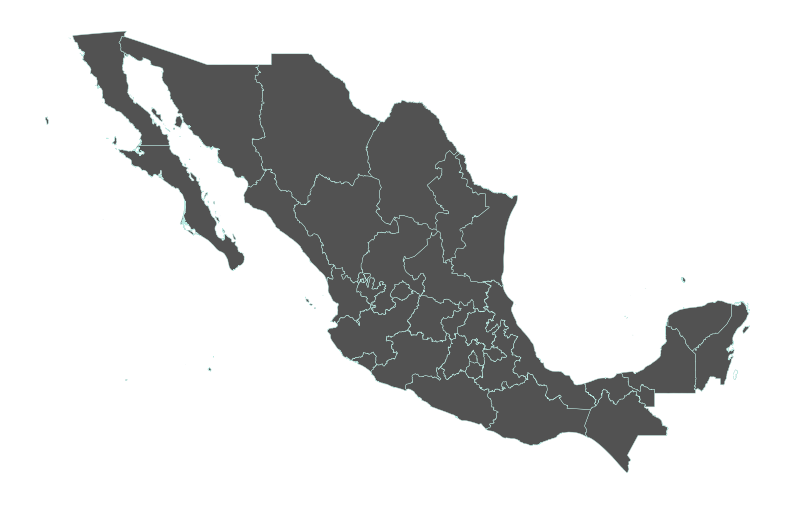

In [155]:
import geopandas as gpd
carpeta_descarga='data/raw/DATOS GEOREFERENCIALES/2023'
mapa_a = f'{carpeta_descarga}/2023_1_00_ENT.shp'
map_a = gpd.read_file(mapa_a)
fig , fila = plt.subplots(1, figsize=(10,11))
map_a.plot(
    linewidth=0.3,
    facecolor='#525252',
    edgecolor='#B9EBE3',
    ax=fila
)
fila.set_axis_off()
plt.show()

In [156]:
map_a

,CVEGEO,CVE_ENT,NOMGEO,geometry
0,01,01,Aguascalientes,"POLYGON ((-102.29739 22.45527, -102.29554 22.4..."
1,02,02,Baja California,"MULTIPOLYGON (((-114.11561 28.09639, -114.1152..."
2,03,03,Baja California Sur,"MULTIPOLYGON (((-109.89451 22.87476, -109.8946..."
3,04,04,Campeche,"MULTIPOLYGON (((-91.9565 20.197, -91.95636 20...."
4,05,05,Coahuila de Zaragoza,"POLYGON ((-102.31549 29.88, -102.31509 29.8799..."
5,06,06,Colima,"MULTIPOLYGON (((-114.73734 18.37206, -114.7364..."
6,07,07,Chiapas,"POLYGON ((-91.99567 17.94259, -91.99296 17.939..."
7,08,08,Chihuahua,"POLYGON ((-108.13866 31.78375, -108.13614 31.7..."
8,09,09,Ciudad de México,"POLYGON ((-99.12215 19.59248, -99.12078 19.592..."
9,10,10,Durango,"POLYGON ((-106.03486 26.83507, -106.03319 26.8..."


In [158]:
map_a['CVE_ENT']=map_a['CVE_ENT'].astype('int')

In [161]:
df_t=g_df.groupby('entidad')['gradoaprob'].value_counts(normalize=True).reset_index(name='proportion')


In [162]:
final_df=pd.merge(df_t,map_a,left_on='entidad',right_on='CVE_ENT',how='inner')
final_df

,entidad,gradoaprob,proportion,CVEGEO,CVE_ENT,NOMGEO,geometry
0,1,3,0.523231,01,1,Aguascalientes,"POLYGON ((-102.29739 22.45527, -102.29554 22.4..."
1,1,2,0.129568,01,1,Aguascalientes,"POLYGON ((-102.29739 22.45527, -102.29554 22.4..."
2,1,1,0.116738,01,1,Aguascalientes,"POLYGON ((-102.29739 22.45527, -102.29554 22.4..."
3,1,6,0.100019,01,1,Aguascalientes,"POLYGON ((-102.29739 22.45527, -102.29554 22.4..."
4,1,4,0.060556,01,1,Aguascalientes,"POLYGON ((-102.29739 22.45527, -102.29554 22.4..."
...,...,...,...,...,...,...,...
219,32,2,0.151719,32,32,Zacatecas,"POLYGON ((-102.29548 25.12519, -102.26655 25.1..."
220,32,6,0.087190,32,32,Zacatecas,"POLYGON ((-102.29548 25.12519, -102.26655 25.1..."
221,32,5,0.084694,32,32,Zacatecas,"POLYGON ((-102.29548 25.12519, -102.26655 25.1..."
222,32,4,0.051085,32,32,Zacatecas,"POLYGON ((-102.29548 25.12519, -102.26655 25.1..."


In [167]:
data

,entidad,gradoaprob,proportion,CVEGEO,CVE_ENT,NOMGEO,geometry
0,1,3,0.523231,01,1,Aguascalientes,"POLYGON ((-102.29739 22.45527, -102.29554 22.4..."
7,2,3,0.515588,02,2,Baja California,"MULTIPOLYGON (((-114.11561 28.09639, -114.1152..."
14,3,3,0.523323,03,3,Baja California Sur,"MULTIPOLYGON (((-109.89451 22.87476, -109.8946..."
21,4,3,0.478833,04,4,Campeche,"MULTIPOLYGON (((-91.9565 20.197, -91.95636 20...."
28,5,3,0.554147,05,5,Coahuila de Zaragoza,"POLYGON ((-102.31549 29.88, -102.31509 29.8799..."
35,6,3,0.490780,06,6,Colima,"MULTIPOLYGON (((-114.73734 18.37206, -114.7364..."
42,7,3,0.407209,07,7,Chiapas,"POLYGON ((-91.99567 17.94259, -91.99296 17.939..."
49,8,3,0.575567,08,8,Chihuahua,"POLYGON ((-108.13866 31.78375, -108.13614 31.7..."
56,9,3,0.505803,09,9,Ciudad de México,"POLYGON ((-99.12215 19.59248, -99.12078 19.592..."
63,10,3,0.531500,10,10,Durango,"POLYGON ((-106.03486 26.83507, -106.03319 26.8..."


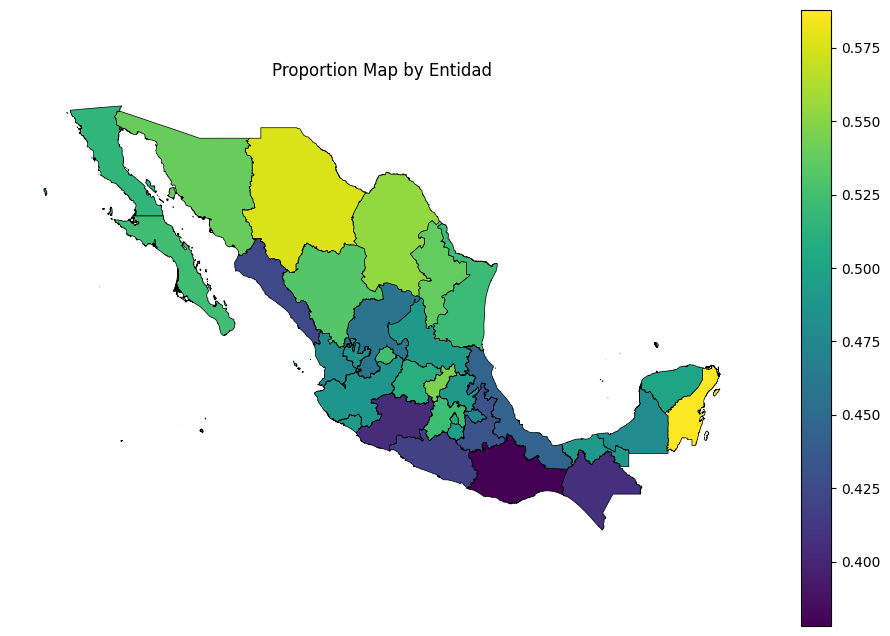

In [171]:
is_gradoaprob=final_df['gradoaprob']==3
data=final_df[is_gradoaprob]
data=gpd.GeoDataFrame(data, geometry='geometry')
fig, ax = plt.subplots(figsize=(12, 8))

data.plot(
    column='proportion',
    cmap='viridis',       # Colormap for visualizing proportions
    linewidth=0.5,         # Line thickness for borders
    edgecolor='black',      # Border color between regions
    legend=True,            # Add a legend to show the color scale
    ax=ax                   # Plot on the provided axes
)

ax.set_axis_off()  # Remove axes for a clean map
plt.title("Proportion Map by Entidad")  # Optional: Add a title
plt.show()


In [169]:
print(type(data))


<class 'pandas.core.frame.DataFrame'>


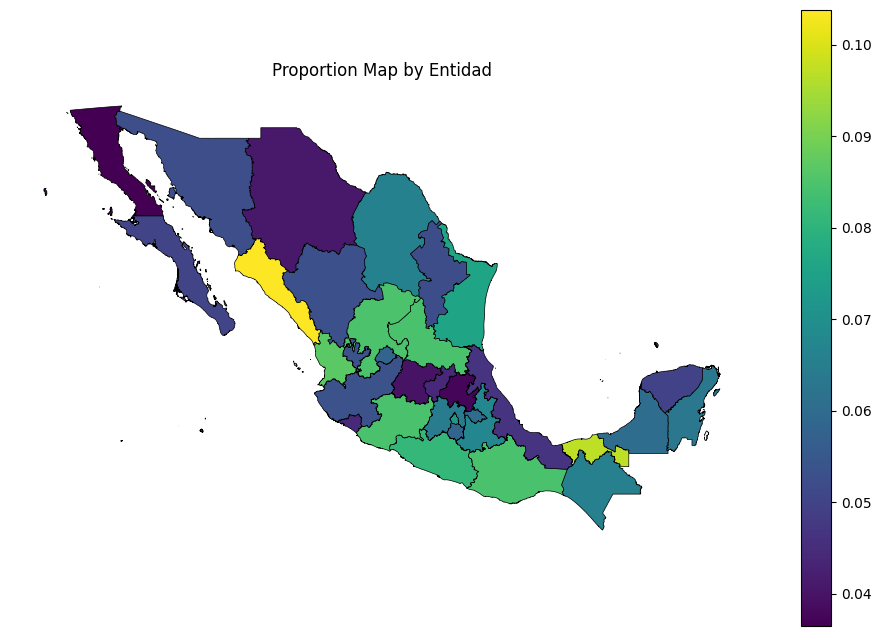

In [172]:
is_gradoaprob=final_df['gradoaprob']==5
data=final_df[is_gradoaprob]
data=gpd.GeoDataFrame(data, geometry='geometry')
fig, ax = plt.subplots(figsize=(12, 8))

data.plot(
    column='proportion',
    cmap='viridis',       # Colormap for visualizing proportions
    linewidth=0.5,         # Line thickness for borders
    edgecolor='black',      # Border color between regions
    legend=True,            # Add a legend to show the color scale
    ax=ax                   # Plot on the provided axes
)

ax.set_axis_off()  # Remove axes for a clean map
plt.title("Proportion Map by Entidad")  # Optional: Add a title
plt.show()
